<a href="https://colab.research.google.com/github/kylelee417/Data-Science_Portfolio/blob/master/tensorflow_miniproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [1]:
import keras
import numpy as np
from keras.utils import to_categorical

Using TensorFlow backend.


**Import MNIST number dataset from Keras**

In [0]:
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [4]:
X_train.shape

(60000, 28, 28)

In [0]:
import matplotlib.pyplot as plt

**Checking the first data from the training set**


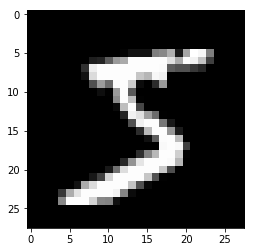

In [6]:
plt.imshow(X_train[0],cmap='gray')

In [7]:
len(set(y_train))

10

In [8]:
y_train[0]

5

In [0]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255



In [12]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test,3)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout
from keras.optimizers import Adam


In [15]:
X_train[0].shape

(28, 28, 1)

**Model Parameter**

In [16]:
  model = Sequential()
  model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=X_train[0].shape))
  model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
  model.add(Dropout(0.5))
  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation='softmax'))

W0708 15:01:50.182281 140396014643072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 15:01:50.209858 140396014643072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 15:01:50.213682 140396014643072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 15:01:50.253185 140396014643072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0708 15:01:50.266955 

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6422656   
__________

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

W0708 15:01:50.406711 140396014643072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 15:01:50.448755 140396014643072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



**Training the model for 20 epochs**

In [19]:
hist = model.fit(X_train,y_train,batch_size=256,epochs=20,verbose=1,validation_split=0.2)

W0708 15:01:50.699269 140396014643072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 18s 369us/step - loss: 0.3386 - acc: 0.8941 - val_loss: 0.0654 - val_acc: 0.9801
Epoch 2/20
48000/48000 [==============================] - 15s 309us/step - loss: 0.1037 - acc: 0.9701 - val_loss: 0.0524 - val_acc: 0.9866
Epoch 3/20
48000/48000 [==============================] - 15s 310us/step - loss: 0.0747 - acc: 0.9772 - val_loss: 0.0487 - val_acc: 0.9857
Epoch 4/20
48000/48000 [==============================] - 15s 309us/step - loss: 0.0578 - acc: 0.9822 - val_loss: 0.0504 - val_acc: 0.9877
Epoch 5/20
48000/48000 [==============================] - 15s 309us/step - loss: 0.0490 - acc: 0.9850 - val_loss: 0.0410 - val_acc: 0.9888
Epoch 6/20
48000/48000 [==============================] - 15s 312us/step - loss: 0.0408 - acc: 0.9880 - val_loss: 0.0401 - val_acc: 0.9896
Epoch 7/20
48000/48000 [==============================] - 15s 309us/step - loss: 0.0346 - acc: 0.9888 - val_loss: 0.

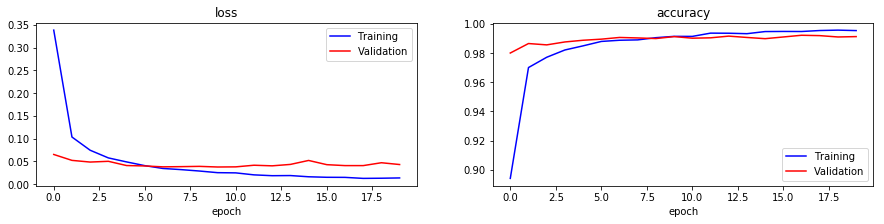

In [20]:
loss = [hist.history['loss'],hist.history['val_loss']]
acc = [hist.history['acc'],hist.history['val_acc']]



fig, axes = plt.subplots(1,2,figsize = (15,3))

# fig.suptitle(model_name)

for ax,val,name in zip(axes,(loss,acc),['loss','accuracy']):

    ax.plot(val[0], color='b', label="Training")

    ax.plot(val[1], color='r', label="Validation")

    ax.legend(loc='best')

    ax.set_xlabel('epoch')

    ax.set_ylabel('')

    ax.set_title(name)

In [21]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 184us/step


[0.03212657616790238, 0.9925]

**Testing the model at 5th position**

In [0]:
pred = model.predict(X_test)

In [23]:
pred[5]

array([4.5961818e-16, 1.0000000e+00, 1.2639798e-13, 3.8112393e-17,
       4.6477080e-13, 1.2647834e-16, 2.1533833e-15, 8.0805189e-12,
       4.1752791e-13, 4.7872470e-16], dtype=float32)

In [24]:
np.argmax(pred[5])

1

In [25]:
X_test[5].shape

(28, 28, 1)

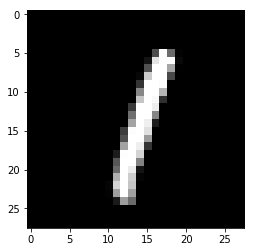

In [26]:
plt.imshow(X_test[5][:,:,0],cmap='gray')